# Analysis of Gender Wage Gap - Michelle Kim, Michael McGeachy, Millie Pandya, Cara Seely

# Summary

For this project, our question of interest was *what is the influence of age, education, and marital status upon the gender wage gap, as measured by income*? This has been an area of increasing interest, and understanding its influencing factors is important for rectifying this disparity going forward. We sourced dynamic data from the General Social Survey, and cleaned the corresponding data columns to facilitate our analysis, a process documented later in this paper. Final visualizations include a series of bar graphs and kernel density plots, coupled with statistical comparisons between the variables of interest and a baseline figure we computed to begin our analysis. The variables and comparison categories were thoughtfully chosen to best accomodate a multigenerational analysis, showing the change in wage gap over time. To ensure thoroughness, each variable was broken down into each of its constituent categories to see where the wage gap was the most impactful. The age component demonstrated a general trend that younger professionals exhibited less of a gap than older age cohorts, at only 9% compared to a 19.8% baseline. Those that were not married or divorced also had a smaller gap when compared to their married or widowed counterparts. Finally, looking at education we found the largest gap was found among those with the lowest levels of education, a trend that steadily decreased as the level of education attained increased. Overall, those who are widowed, very old, or received the lowest education were found to suffer the most from the gender wage gap, with it being likely there is some overlap between the very old and widowed findings given the tendency for women to live longer than men. While there needs to be further analysis for proper causative inference questions, our findings might suggest that  attempts in recent years to address and solve the gender wage gap have been effective, especially amongst those in jobs requiring higher education and/or specialization.

# Data

The following section explains the data cleaning choices that were made to facilitate our analysis. First pertains to the gender category, where we chose to only include results that fell into the male/female gender dichotomy. The GSS dataset initially included a broader spectrum of genders. Given that our research question focuses on the gender wage gap, which historically has only investigated the wage difference between men and women, it was important to narrow down the data to responses that only included these responses to ensure continuity. Limiting the scope of the analysis with less data and genders was deemed necessary for specificity and accuracy.

For the age variable, we made the choice to eventually sort the original datasets division of ages into a series of age ranges, rather than singular specific values. The actual age of any single participant wasn't relevant to our analysis, and we felt grouping ages into generations would better serve our wage gap question. The 'generational' age groups allowed us to make better generalizations about younger vs older survey participants, and made it easier to draw conclusions about how the wage gap has evolved over time.

Regarding education, we chose to remove the responses that did not specify what level of education was attained. Coding these nonresponses as a separate variable was not considered appropriate given our lack of information, and removing them was needed to properly visualize the data later. We removed these empty entries to ensure that the analysis contains complete data.

To clean the marital status data, the team consolidated the responses for ‘not married’ and ‘never married’ into one cohesive label. This was done to accommodate for the chance different survey years had different response options. The rest of the existing categories for marital status were maintained, as they were appropriate for the analysis that followed.

Following the cleaning process, the data is better structured for analysis, with clearer categories and more consistent entries. In summary, the data cleaning process for this analysis involved thoughtful decisions on how to handle various variables, with a focus on aligning the dataset with the research question while addressing inconsistencies and gaps in the data. Each decision, from narrowing down the gender categories to consolidating marital status responses, was made with the intent to enhance the clarity and relevance of the data for exploring the gender wage gap.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
! git clone https://github.com/DS3001/project_gss

Cloning into 'project_gss'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 23 (delta 6), reused 1 (delta 1), pack-reused 15
Receiving objects: 100% (23/23), 23.94 MiB | 26.44 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
df = pd.read_csv('/Users/michellekim/Downloads/cleanedSECOND.csv', low_memory=False)
print(df)

        age     sex   race                    degree     health         happy  \
0      48.0    male  white               high school       poor           NaN   
1      25.0    male  white                bachelor's        NaN  pretty happy   
2      42.0    male  white                bachelor's        NaN  pretty happy   
3      24.0    male  white               high school       good           NaN   
4      24.0  female  white                bachelor's  excellent    very happy   
...     ...     ...    ...                       ...        ...           ...   
24125  22.0  female  white               high school       good  pretty happy   
24126  29.0  female  white                  graduate       good  pretty happy   
24127  32.0    male  white  associate/junior college       good  pretty happy   
24128  49.0  female  white                  graduate       good    very happy   
24129  50.0    male  white                  graduate       fair  pretty happy   

             marital       

# Isolating out the variables we want to analyze, and checking the potential responses for each of them:

In [ ]:
# We can first list all of the possible responses given for 'sex':
sex_responses = []
for response in df['sex']:
    if response not in sex_responses:
        sex_responses.append(response)
print(sex_responses)

['male', 'female', nan]


In [ ]:
# We can repeat this for marital status:
marriage_responses = []
for response in df['marital']:
    if response not in marriage_responses:
        marriage_responses.append(response)
print(marriage_responses)

['married', 'never married', 'divorced', 'not married', 'widowed']


In [ ]:
# As well as education and income:
education_responses = []
for response in df['degree']:
    if response not in education_responses:
        education_responses.append(response)
print(education_responses)

income_responses = []
for response in df['income16']:
    if response not in income_responses:
        income_responses.append(response)
print(income_responses)
# This information can also be found in the codebook,
# but it is important to check that the data post-cleaning is what we expect.

['high school', "bachelor's", 'associate/junior college', 'graduate', 'less than high school', nan]
['unemployed/zero income', '$170,000 or over', '$50,000 to $59,999', '$75,000 to $89,999', '$60,000 to $74,999', '$30,000 to $34,999', 'under $1,000', '$8,000 to $9,999', '$12,500 to $14,999', '$40,000 to $49,999', '$5,000 to $5,999', '$35,000 to $39,999', '$25,000 to $29,999', '$90,000 to $109,999', '$22,500 to $24,999', '$20,000 to $22,499', '$110,000 to $129,999', '$150,000 to $169,999', '$130,000 to $149,999', '$1,000 to $2,999', '$17,500 to $19,999', '$6,000 to $6,999', '$10,000 to $12,499', '$15,000 to $17,499', '$7,000 to $7,999', '$3,000 to $3,999', '$4,000 to $4,999']


# Replacing the non-numerical values for income with numerical values:

In [ ]:
# Replacing the string based income values with numbers to make plotting and analysis easier:
# (For each income range given, we are converting it to its mean value)
# This has potential issues; for example, the "$170,000 or over" bucket is being lumped into an income
# of $170,000; this will make mean values of the income quantitatively inaccurate, but comparisons for the
# sake of the gender pay gap should still hold.

df = df.replace('unemployed/zero income', 0)
df = df.replace('$170,000 or over', 170000)
df = df.replace('$50,000 to $59,999', 55000)
df = df.replace('$75,000 to $89,999', 82500)
df = df.replace('$60,000 to $74,999', 67500)
df = df.replace('$30,000 to $34,999', 32500)
df = df.replace('under $1,000', 500)
df = df.replace('$8,000 to $9,999', 9000)
df = df.replace('$12,500 to $14,999', 13750)
df = df.replace('$40,000 to $49,999', 45000)
df = df.replace('$5,000 to $5,999', 5500)
df = df.replace('$35,000 to $39,999', 37500)
df = df.replace('$25,000 to $29,999', 27500)
df = df.replace('$90,000 to $109,999', 100000)
df = df.replace('$22,500 to $24,999', 23750)
df = df.replace('$20,000 to $22,499', 21250)
df = df.replace('$110,000 to $129,999', 120000)
df = df.replace('$150,000 to $169,999', 160000)
df = df.replace('$130,000 to $149,999', 140000)
df = df.replace('$1,000 to $2,999', 2000)
df = df.replace('$17,500 to $19,999', 18750)
df = df.replace('$6,000 to $6,999', 6500)
df = df.replace('$10,000 to $12,499', 11250)
df = df.replace('$15,000 to $17,499', 16250)
df = df.replace('$7,000 to $7,999', 7500)
df = df.replace('$3,000 to $3,999', 3500)
df = df.replace('$4,000 to $4,999', 4500)

# To verify the data cleaning above works
print(sorted(df['income16'].unique()))

[0, 500, 2000, 3500, 4500, 5500, 6500, 7500, 9000, 11250, 13750, 16250, 18750, 21250, 23750, 27500, 32500, 37500, 45000, 55000, 67500, 82500, 100000, 120000, 140000, 160000, 170000]


# Making a plot and some preliminary analysis:

<AxesSubplot:xlabel='income16', ylabel='Density'>

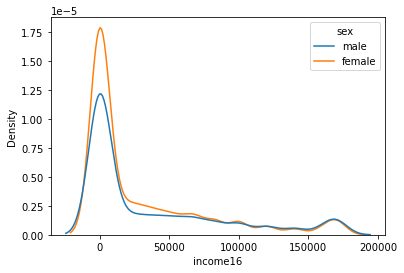

In [ ]:
# First, we can see if the gender wage gap is immediately visible in a histogram:
sns.kdeplot(data=df,x='income16',hue='sex')

It does appear that in the lower income percentile, the proportion of females is greater; we can also quantify this by looking at some statistics regarding this data:

In [ ]:
df.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female  13234.0  30262.959045  46898.119324  0.0  0.0  0.0  45000.0  170000.0
male    10784.0  36264.396328  52152.345673  0.0  0.0  0.0  67500.0  170000.0

We see that the mean income for males is higher, by about 19.8%, which will serve as our baseline estimate of the gender pay gap that we compare to with further analysis.

# The impact of age on the gender wage gap:

To begin, we can see if any visual trends appear when creating a scatterplot of income levels and age, with hue determined by sex:

<AxesSubplot:xlabel='income16', ylabel='age'>

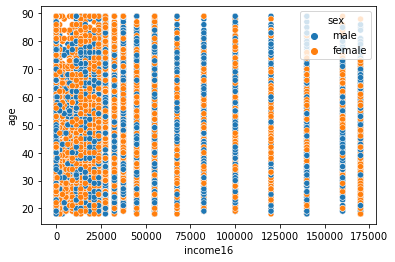

In [ ]:
sns.scatterplot(data=df,x='income16',y='age',hue='sex')

This is not particularly illuminating, so we can first try separating age into four broad groups: "young" (below 35 years old), "middle-aged" (between 35 and 50 years old), "older" (between 50 and 70 years old), and "very old" (above 70 years old). Then, we can separate our earlier kernel density plot into four separate sets of statistics regarding the differences in income for the genders (this can also be done with a more finely-grained set of age groups):

In [ ]:
df_young = df.loc[(df['age'] < 35)] # This is the dataframe we'll use for the "young" age category
# If the age doesn't fit with our "young" definition, we delete that row from this new dataframe.

<AxesSubplot:xlabel='income16', ylabel='Density'>

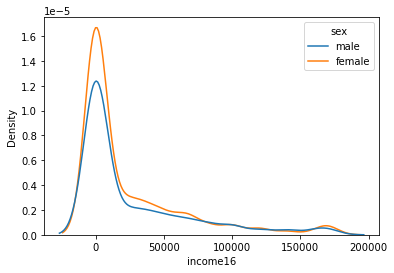

In [ ]:
sns.kdeplot(data=df_young,x='income16',hue='sex')

In [ ]:
df_young.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3299.0  24419.217945  40653.268153  0.0  0.0  0.0  37500.0  170000.0
male     2686.0  26610.387193  42799.717712  0.0  0.0  0.0  45000.0  170000.0

Here, we see that the income for males is only about 9.0% higher, lower than our baseline of 19.8% overall from earlier. We can hypothesize here that the gender wage gap is higher amongst older adults, and may have decreased over time due to increased efforts to educate the public and/or address the issue. We can test this with further analysis.

In [ ]:
df_middleaged = df.loc[(df['age'] >= 35) & (df['age'] < 50)]
df_middleaged.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3440.0  32833.575581  50274.722441  0.0  0.0  0.0  55000.0  170000.0
male     2756.0  39377.721335  55509.772662  0.0  0.0  0.0  67500.0  170000.0

In this category, we see that the income for males is about 19.9% higher than that for females, about equal to our baseline of 19.8% that we found earlier.

In [ ]:
df_older = df.loc[(df['age'] >= 50) & (df['age'] < 70)]
df_older.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   4232.0  35056.001890  50519.327283  0.0  0.0  0.0  55000.0  170000.0
male     3661.0  39249.385414  55492.928489  0.0  0.0  0.0  67500.0  170000.0

Here, we see that the income for males is about 12.0% higher than that of females, lower than our baseline of 19.8% earlier. This is contrary to our hypothesis that the gender wage gap is higher at higher ages, but we will visually see the data more clearly in a bar graph later below. Before this, we can examine our "very old" group:

In [ ]:
df_veryold = df.loc[(df['age'] >= 70)]
df_veryold.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                          \
          count          mean           std  min  25%      50%      75%   
sex                                                                       
female   1973.0  23976.178409  39333.639650  0.0  0.0      0.0  32500.0   
male     1472.0  38345.108696  49238.667079  0.0  0.0  15000.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

Here we find a much higher wage gap of about 60.0%, in line with our original hypothesis that the gender wage gap rises with age; however, there are other factors to consider here: for example, people aged higher than 70 may well have grown up in a time when there were fewer opportunities for women to enter the workforce for similar pay to men, and this may be a cause of the drastically high wage gap in this case.

We can also visually see the differences in gender pay gap based on age if we show a bar graph of the incomes of males and females at several different groups of ages:

<AxesSubplot:xlabel='agegroup', ylabel='income16'>

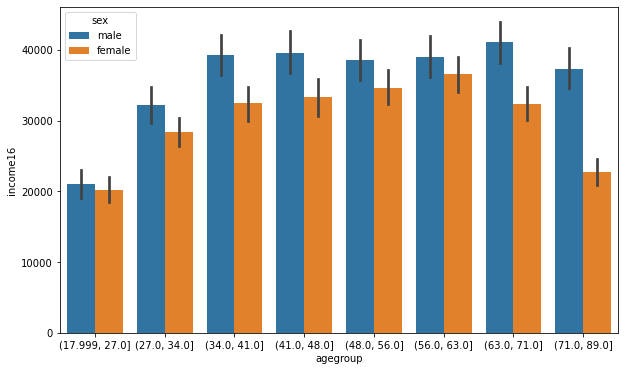

In [ ]:
df['agegroup'] = pd.qcut(df['age'],8)
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='agegroup',y='income16',hue='sex',ax=ax)

Here, we see that the gender wage gap does broadly rise with age, though it decreases for a few of the age groups between 45 and 65, in line with what we observed from the statistics earlier.

# The impact of marital status on gender wage gap:

Here, since there are only a few different marital status groups, we can start by plotting a bar graph of income differences between males and females within groups of different marital statuses:

<AxesSubplot:xlabel='marital', ylabel='income16'>

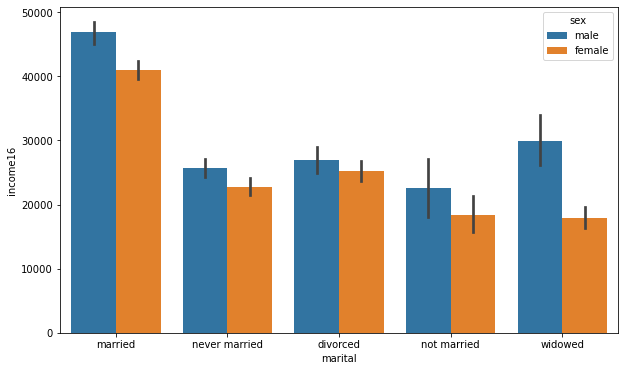

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='marital',y='income16',hue='sex',ax=ax)

Here, we see that the gender pay gap seems to be lower for never married, divorced, and unmarried individuals, whereas higher for married or widowed individuals. We can also examine numerical statistics for each of these groups, comparing the wage gap percentage to our overall baseline of 19.8% that we found earlier:

In [ ]:
df_married = df.loc[(df['marital'] == 'married')]
df_married.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   5651.0  40950.893647  56159.601497  0.0  0.0  0.0  82500.0  170000.0
male     5237.0  46850.105022  59758.619428  0.0  0.0  0.0  82500.0  170000.0

In [ ]:
print("MARRIED\n")
print("Percent difference: " + str(round((46850.105022 - 40950.893647)/40950.893647*100,1)) + "%")
print("Baseline: 19.8%")

MARRIED

Percent difference: 14.4%
Baseline: 19.8%


In [ ]:
df_nevermarried = df.loc[(df['marital'] == 'never married')]
df_nevermarried.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   3294.0  22706.739526  37611.270127  0.0  0.0  0.0  32500.0  170000.0
male     3119.0  25757.855082  40673.803621  0.0  0.0  0.0  37500.0  170000.0

In [ ]:
print("NEVER MARRIED\n")
print("Percent difference: " + str(round((25757.855082 - 22706.739526)/22706.739526*100,1)) + "%")
print("Baseline: 19.8%")

NEVER MARRIED

Percent difference: 13.4%
Baseline: 19.8%


In [ ]:
df_divorced = df.loc[(df['marital'] == 'divorced')]
df_divorced.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                         \
          count          mean           std  min  25%     50%      75%   
sex                                                                      
female   2341.0  25269.863306  37972.587399  0.0  0.0  2000.0  37500.0   
male     1635.0  26888.990826  41973.515407  0.0  0.0     0.0  45000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("DIVORCED\n")
print("Percent difference: " + str(round((26888.990826 - 25269.863306)/25269.863306*100,1)) + "%")
print("Baseline: 19.8%")

DIVORCED

Percent difference: 6.4%
Baseline: 19.8%


In [ ]:
df_notmarried = df.loc[(df['marital'] == 'not married')]
df_notmarried.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female    481.0  18432.952183  32379.388384  0.0  0.0  0.0  23750.0  170000.0
male      308.0  22516.233766  39317.535886  0.0  0.0  0.0  32500.0  170000.0

In [ ]:
print("NOT MARRIED\n")
print("Percent difference: " + str(round((22516.233766 - 18432.952183)/18432.952183*100,1)) + "%")
print("Baseline: 19.8%")

NOT MARRIED

Percent difference: 22.2%
Baseline: 19.8%


In [ ]:
df_widowed = df.loc[(df['marital'] == 'widowed')]
df_widowed.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                        \
          count          mean           std  min  25%    50%      75%   
sex                                                                     
female   1467.0  17905.589639  32690.145039  0.0  0.0    0.0  23750.0   
male      485.0  29863.917526  44664.359360  0.0  0.0  500.0  45000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("WIDOWED\n")
print("Percent difference: " + str(round((29863.917526 - 17905.589639)/17905.589639*100,1)) + "%")
print("Baseline: 19.8%")

WIDOWED

Percent difference: 66.8%
Baseline: 19.8%


Overall, we see that the gender wage gap is slightly lower for individuals that are unmarried, except in the case of widowed individuals, in which there is a dramatic wage gap. It is noteworthy, though, that the sample size of widowed men is significantly lower than that of widowed women; we know women tend to live longer than men, so this is to be expected, but this does also hint that there may be other extenuating factors that make this group have a particularly large wage gap, including the argument posed for the "very old" group from the previous section.



# The impact of education on gender wage gap:

Like in the previous section, since there are relatively few groups of education levels, we can begin with a bar graph to look for any visually apparent trends:

<AxesSubplot:xlabel='degree', ylabel='income16'>

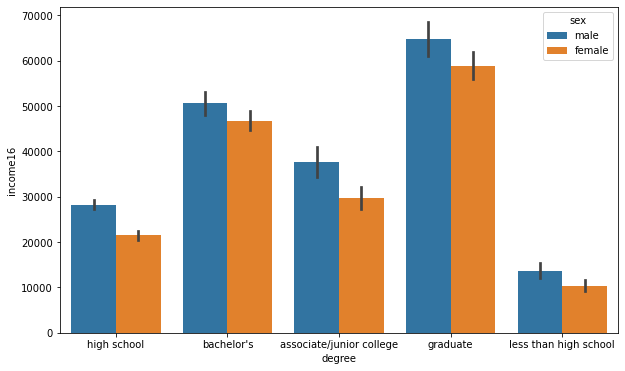

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='degree',y='income16',hue='sex',ax=ax)

From this, it appears that the gender wage gap may be lower for individuals with higher levels of education. As in the previous section, we can examine the statistics for each of these groups as well, comparing wage gap percentages to our baseline level:

In [ ]:
df_highschool = df.loc[(df['degree'] == 'high school')]
df_highschool.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   6339.0  21460.088342  36090.050439  0.0  0.0  0.0  32500.0  170000.0
male     5234.0  28240.399312  42935.115310  0.0  0.0  0.0  45000.0  170000.0

In [ ]:
print("HIGH SCHOOL\n")
print("Percent difference: " + str(round((28240.399312 - 21460.088342)/21460.088342*100,1)) + "%")
print("Baseline: 19.8%")

HIGH SCHOOL

Percent difference: 31.6%
Baseline: 19.8%


In [ ]:
df_bachelors = df.loc[(df['degree'] == "bachelor's")]
df_bachelors.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                           \
          count          mean           std  min  25%      50%       75%   
sex                                                                        
female   2568.0  46760.514019  56882.116450  0.0  0.0  18750.0   82500.0   
male     2172.0  50684.967772  60426.956171  0.0  0.0  21250.0  100000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("BACHELOR'S\n")
print("Percent difference: " + str(round((50684.967772 - 46760.514019)/46760.514019*100,1)) + "%")
print("Baseline: 19.8%")

BACHELOR'S

Percent difference: 8.4%
Baseline: 19.8%


In [ ]:
df_associates = df.loc[(df['degree'] == "associate/junior college")]
df_associates.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                          \
          count          mean           std  min  25%      50%      75%   
sex                                                                       
female   1196.0  29672.031773  42795.142228  0.0  0.0      0.0  45000.0   
male      782.0  37651.534527  49644.019825  0.0  0.0  11250.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("ASSOCIATE/JUNIOR COLLEGE\n")
print("Percent difference: " + str(round((37651.534527 - 29672.031773)/29672.031773*100,1)) + "%")
print("Baseline: 19.8%")

ASSOCIATE/JUNIOR COLLEGE

Percent difference: 26.9%
Baseline: 19.8%


In [ ]:
df_graduate = df.loc[(df['degree'] == "graduate")]
df_graduate.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                           \
          count          mean           std  min  25%      50%       75%   
sex                                                                        
female   1577.0  58750.792644  63594.703285  0.0  0.0  37500.0  100000.0   
male     1333.0  64845.086272  68307.440630  0.0  0.0  45000.0  120000.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
print("GRADUATE\n")
print("Percent difference: " + str(round((64845.086272 - 58750.792644)/58750.792644*100,1)) + "%")
print("Baseline: 19.8%")

GRADUATE

Percent difference: 10.4%
Baseline: 19.8%


In [ ]:
df_less = df.loc[(df['degree'] == "less than high school")]
df_less.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   1537.0  10357.514639  23989.105067  0.0  0.0  0.0  11250.0  170000.0
male     1252.0  13651.158147  29228.296734  0.0  0.0  0.0  11250.0  170000.0

In [ ]:
print("LESS THAN HIGH SCHOOL\n")
print("Percent difference: " + str(round((13651.158147 - 10357.514639)/10357.514639*100,1)) + "%")
print("Baseline: 19.8%")

LESS THAN HIGH SCHOOL

Percent difference: 31.8%
Baseline: 19.8%


Overall, we do see that the gender wage gap is highest for those with the lowest levels of education, and tends to decrease with increasing education.

# The Impact of Industry on Gender Wage Gap:

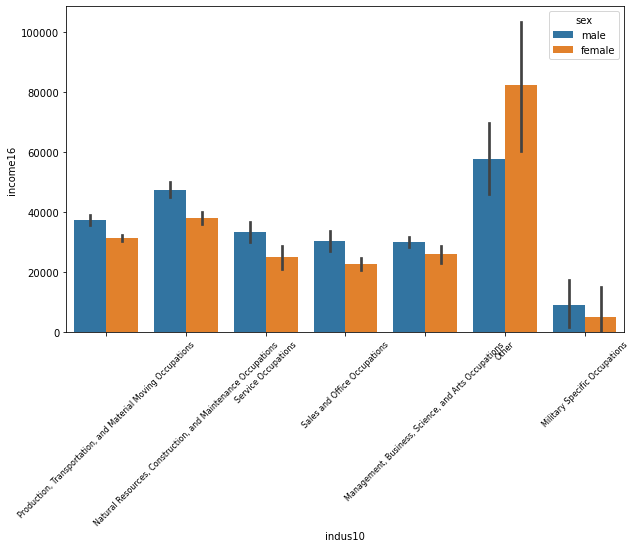

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=df,x='indus10',y='income16',hue='sex',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45)

plt.show()

From the barplot, it is evident that the male gender tends to have a higher income across all industries with the exception of management, business, science, and arts occuptions. To analyze this further, let's look at the statistics

In [ ]:
df_productionindus = df.loc[(df['indus10'] == "Production, Transportation, and Material Moving Occupations")]
df_productionindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                         \
          count          mean           std  min  25%     50%      75%   
sex                                                                      
female   7244.0  31359.573440  47317.456581  0.0  0.0     0.0  55000.0   
male     3420.0  37411.842105  51841.543226  0.0  0.0  2000.0  67500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
df_constructionindus = df.loc[(df['indus10'] == "Natural Resources, Construction, and Maintenance Occupations")]
df_constructionindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                          \
          count          mean           std  min  25%      50%      75%   
sex                                                                       
female   2284.0  38148.314361  52247.377612  0.0  0.0      0.0  67500.0   
male     2323.0  47504.735256  60239.156311  0.0  0.0  11250.0  82500.0   

                  
             max  
sex               
female  170000.0  
male    170000.0

In [ ]:
df_salesindus = df.loc[(df['indus10'] == "Sales and Office Occupations")]
df_salesindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   1315.0  22742.205323  39173.898901  0.0  0.0  0.0  32500.0  170000.0
male      859.0  30393.189756  48016.683043  0.0  0.0  0.0  45000.0  170000.0

In [ ]:
df_managementindus = df.loc[(df['indus10'] == "Management, Business, Science, and Arts Occupations")]
df_managementindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                              
          count          mean           std  min  25%  50%      75%       max
sex                                                                          
female   1098.0  26023.224044  44425.011154  0.0  0.0  0.0  37500.0  170000.0
male     2858.0  29928.184045  46116.468579  0.0  0.0  0.0  55000.0  170000.0

In [ ]:
df_militaryindus = df.loc[(df['indus10'] == "Military Specific Occupations")]
df_militaryindus.loc[:,['sex','income16']].groupby('sex').describe()

income16                                                         
          count         mean           std  min  25%  50%  75%       max
sex                                                                     
female      9.0  5000.000000  15000.000000  0.0  0.0  0.0  0.0   45000.0
male       38.0  8980.263158  27268.459008  0.0  0.0  0.0  0.0  120000.0

From these findings, we can see that the data reveals a disparity in earnings between men and women across various sectors. Notably, men are consistently paid more than women in every industry, underscoring a widespread issue of wage inequality. However, an exception is observed in the "management, business, science, and arts occupations " category, where this trend is inverted. This exception suggests that there could be a more equitable or possibly female-favored wage distribution.

# Conclusion

This project aimed to analyze the factors that underpin the gender wage gap that much of society is familiar with, because by doing so it allows decision makers to target their interventions in the areas that actually matter. To accomplish this, variables around age, marital status, and education were chosen as factors that are often considered to be responsible for the disparity. The data for these was cleaned inorder to make analysis and visualizations more streamlined, with all changes being documented for future replication. Ultimately, a baseline difference of 19.8% was established, with subsequent analysis focusing on how that baseline related to more individualized comparisons. For age, the most notable finding was a difference of only 9% among our youngest comparison group, indicating that either progress has been made to shrink this gap or that wage disparities manifest later in life. This contrasted sharply with our findings in the very old category, demonstrating a difference of 60% that we hypothesized stemmed from women lacking many career options 70 years ago.

Next the analysis centered on marital status, which demonstrated that generally those who identified as divorced or not married were found to have a smaller wage gap than those who were married or widowed. This is indicative of something about married life leading to women making less money, possibly having to shoulder more of the child rearing responsibilities at the detriment to career growth. Finally, the focus shifted onto the role of education and its impact. Through this we found that the gap was the highest for the lowest levels of education and generally decreased as the level of education increased up to the graduate level. These findings lend credence to the idea that education can serve as an equalizer across demographic groups.

Despite what we consider to be extremely strong findings, we recognize that others will likely have criticism for various parts of the process. One area is undoubtedly the variables we included, as we did not consider the role of occupation, location, or the impact of children upon the wage gap. While these are all important factors, we ultimately decided to keep our analysis more focused as including all of those factors, with proper explanations, was outside of this project’s scope. Notably, we recognize that looking at the number of children would have shed more light onto the dynamics we hypothesized in the above section on marital status. There will also likely be criticism for focusing on a traditional, quantitative metric like income compared to the social well being indicators that have increased in popularity with time. While these SWB metrics are often touted as being more descriptive of someone’s true happiness, we regarded them as being both sufficient enough for an entirely separate study as well as being more non objective than the variables we were seeking.

By no means should our work be considered all encompassing, as the above section indicates the numerous other aspects that all play into the wage gap. Future work should focus on creating more localized datasets and carrying out a similar analysis to this one. As more information about the gender wage gap becomes common knowledge, it would be useful to track what cities/regions are doing a better job of countering it. This might also shed light into the underlying dynamics of a localized wage gap. Say if a town supported heavy industry that women did not work in, but instead filled a different job or the cost of living was low enough that they did not have to work as much. Understanding all of these dynamics is important for understanding the true impact of wage disparities. Another path for future work should focus on subjective well being, something that was discussed earlier in this paper. Income is not always the ultimate metric of someone’s life, and there are times when people are completely satisfied with their current situations and lifestyle. This too is important, as highlighting a wage disparity that is actually favored by its respondents should not hold the same weight as a situation where women are actively seeking better wages.